In [2]:
import numpy as np
import matplotlib.pyplot as plt
from solutions import TwoLayerNet
from mnist_loader import load_mnist
from models import DNN
from image_ops import normalize_image_array
from functions import train_val_split, one_hot_encoding

print("All necessary packages have been imported!")

x_train, x_test, t_train, t_test = load_mnist()
x_train, t_train, x_val, t_val = train_val_split(x=x_train, y=t_train, split_ratio=0.2)

print("Check the size of the training set: ", x_train.shape)
print("Check the size of the training label: ", t_train.shape)
print("Check the size of the validation set: ", x_val.shape)
print("Check the size of the validation label: ", t_val.shape)
print("Check the size of the test set: ", x_test.shape)
print("Check the size of the test label: ", t_test.shape)

All necessary packages have been imported!
Just wait a sec. The data is loading...

Converting train-images.idx3-ubyte to NumPy Array ...
Done
Converting t10k-images.idx3-ubyte to NumPy Array ...
Done
Converting train-labels.idx1-ubyte to NumPy Array ...
Done
Converting t10k-labels.idx1-ubyte to NumPy Array ...
Done
Data has been successfully loaded!

Check the size of the training set:  (48000, 784)
Check the size of the training label:  (48000,)
Check the size of the validation set:  (12000, 784)
Check the size of the validation label:  (12000,)
Check the size of the test set:  (10000, 784)
Check the size of the test label:  (10000,)


In [3]:
x_train = normalize_image_array(x_train)
t_train_onehot = one_hot_encoding(x=t_train, n_out_node=10)

In [3]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = x_train.shape[0]
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train_onehot[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train_onehot)
        train_acc_list.append(train_acc)
        print("train acc | " + str(train_acc))

# グラフの描画
# markers = {'train': 'o', 'test': 's'}
# x = np.arange(len(train_acc_list))
# plt.plot(x, train_acc_list, label='train acc')
# plt.plot(x, test_acc_list, label='test acc', linestyle='--')
# plt.xlabel("epochs")
# plt.ylabel("accuracy")
# plt.ylim(0, 1.0)
# plt.legend(loc='lower right')
# plt.show()

train acc | 0.11258333333333333


/home/moqian/workspace/little-mnist-project/solutions.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


train acc | 0.10197916666666666
train acc | 0.1034375
train acc | 0.0989375
train acc | 0.09772916666666667
train acc | 0.09914583333333334
train acc | 0.09895833333333333
train acc | 0.09666666666666666
train acc | 0.0913125
train acc | 0.09925
train acc | 0.09772916666666667
train acc | 0.11258333333333333
train acc | 0.1034375
train acc | 0.10197916666666666
train acc | 0.0989375
train acc | 0.09914583333333334
train acc | 0.09895833333333333
train acc | 0.09666666666666666
train acc | 0.0913125
train acc | 0.09925
train acc | 0.09772916666666667
train acc | 0.11258333333333333
train acc | 0.1034375
train acc | 0.10197916666666666
train acc | 0.09914583333333334
train acc | 0.09895833333333333
train acc | 0.09666666666666666
train acc | 0.0989375
train acc | 0.0913125
train acc | 0.09925
train acc | 0.09772916666666667
train acc | 0.11258333333333333
train acc | 0.09914583333333334
train acc | 0.1034375
train acc | 0.10197916666666666
train acc | 0.09895833333333333
train acc | 0.09

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (84,) and (0,)

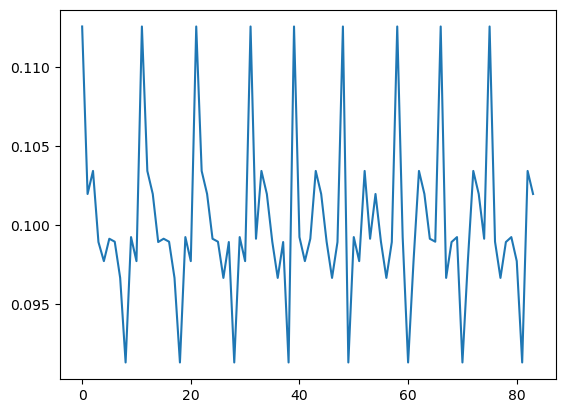

In [4]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import SGD

model = Sequential([
    Dense(256, activation='relu', input_dim=784),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer=SGD(),
    loss=CategoricalCrossentropy(),
)

model.fit(
    x_train,
    t_train_onehot,
    epochs=500,
    batch_size=50  # full‑batch gradient descent
)

Epoch 1/500


2026-01-12 18:22:50.789428: I external/local_xla/xla/service/service.cc:163] XLA service 0x717bc0002100 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-01-12 18:22:50.789454: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce MX570 A, Compute Capability 8.6
2026-01-12 18:22:50.825788: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2026-01-12 18:22:50.903746: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91700
2026-01-12 18:22:50.940639: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2026-01-12 18:22:51.414153: I ex

 62/960 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.2766

I0000 00:00:1768213373.295695  224190 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.8506
Epoch 2/500
960/960 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3243
Epoch 3/500
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2647
Epoch 4/500
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2284
Epoch 5/500
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2015
Epoch 6/500
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1797
Epoch 7/500
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1619
Epoch 8/500
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1469
Epoch 9/500
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1352
Epoch 10/500
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1241
Epoch 11/500
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1145
Epoch 12/500
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1062
Epoch 13/500
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0986
Epoch 14/500
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0917
Epoch 15/500
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step -

KeyboardInterrupt: 

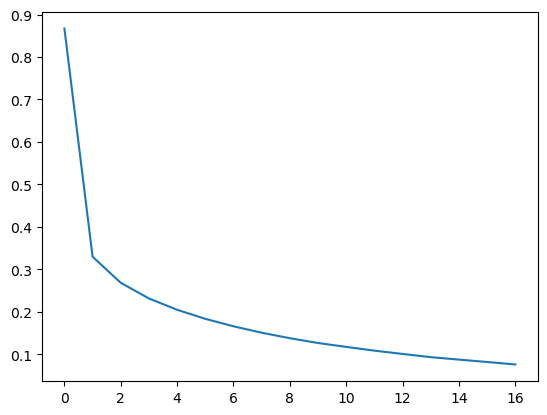

In [17]:
import matplotlib.pyplot as plt

accs = model.history.history['loss']
plt.plot(accs)

In [22]:
model.weights[2]

<Variable path=sequential_2/dense_9/kernel, shape=(256, 256), dtype=float32, value=[[-0.00758187 -0.00917905  0.04785661 ...  0.04710453  0.07507942
  -0.07536379]
 [-0.05774238  0.03967812  0.08156303 ...  0.02940661  0.10628385
   0.03764253]
 [ 0.10817015 -0.0146502   0.10050507 ... -0.00414046 -0.04004581
   0.04643741]
 ...
 [-0.03386953 -0.07764553  0.08061093 ...  0.01457512  0.03267239
  -0.12510307]
 [ 0.06295735  0.03481364 -0.01569164 ... -0.0130693   0.00210891
  -0.00638247]
 [ 0.10476834 -0.04884123  0.07154079 ...  0.09896852  0.01985968
   0.09042382]]>